# 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Australia/'QUT IT'/'IFN509 Data Exploration and Mining'/Ass2

/content/drive/MyDrive/Australia/QUT IT/IFN509 Data Exploration and Mining/Ass2


In [3]:
import numpy as np
import pandas as pd
#na_value=“?”
df = pd.read_csv('D2.csv')
#,na_values="?"
df.info()
# print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

In [4]:
df['readmitted']=df['readmitted'].astype(bool)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

In [ ]:

# the number of lab procedures 9
# the number of outpatient visits 12
# the number of inpatient visits 14
# the number of medications 11 
# the time spent in the hospital 7

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


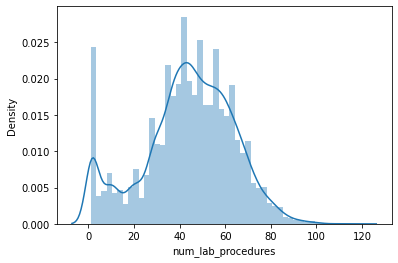

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


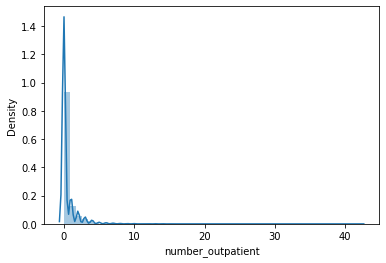

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


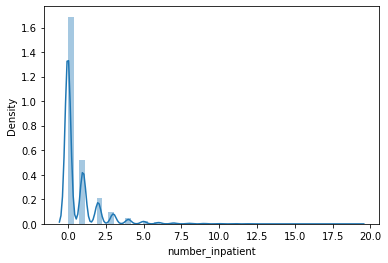

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


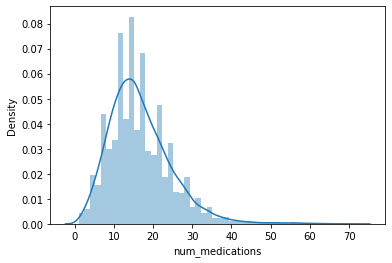

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


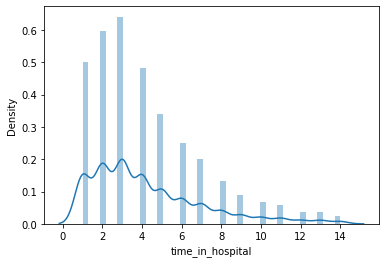

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

regdens_dist = sns.distplot(df['num_lab_procedures'].dropna())
plt.show()

medhhinc_dist = sns.distplot(df['number_outpatient'].dropna())
plt.show()

meanhhsz_dist = sns.distplot(df['number_inpatient'].dropna())
plt.show()

meanhhsz_dist = sns.distplot(df['num_medications'].dropna())
plt.show()

meanhhsz_dist = sns.distplot(df['time_in_hospital'].dropna())
plt.show()



# 2

In [56]:
from sklearn.preprocessing import StandardScaler
# take 3 variables and drop the rest
df2 = df[['num_lab_procedures', 'num_medications', 'number_outpatient','number_inpatient','time_in_hospital']]
# convert df2 to matrix
X = df2.to_numpy()
# scaling
scaler = StandardScaler()
X_normal = X
X = scaler.fit_transform(X)


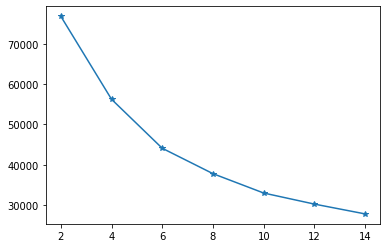

KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.3001206085879428
KMeans(n_clusters=6, random_state=42)
Silhouette score for k=6 0.20010629990287715


In [57]:
# list to save the clusters and cost
clusters = []
inertia_vals = []
rs = 42
# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs )
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)


plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

from sklearn.metrics import silhouette_score
print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))
print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

In [60]:
# print the centroid locations without standard
from sklearn.cluster import KMeans
# random state, we will use 42 instead of 10 for a change
rs = 42
# set the random state. different random state seeds might result in different centr
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X_normal)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
 print(centroid)

Sum of intra-cluster distance: 2114335.3429706125
Centroid locations:
[36.30381393 15.35235481  0.48988732  0.69979775  3.55460849]
[ 8.92493386 12.68386243  0.51851852  0.58267196  2.63492063]
[70.61995879 23.28760671  0.57050339  0.74359729  6.53694436]
[53.5817936  16.55866006  0.50202794  0.73471534  4.46988133]


In [62]:
# set a different n_clusters with standard
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)


Sum of intra-cluster distance: 56236.37948568235
Centroid locations:
[ 0.04308724  0.12702759  4.038035    0.23623019 -0.02497738]
[0.05641421 0.15076266 0.08726438 2.83572398 0.09218879]
[ 0.71012619  0.85489997 -0.13696784 -0.15183449  1.00499808]
[-0.37529633 -0.46509602 -0.15298308 -0.25266431 -0.52796785]


# 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Cluster membership
3    11896
2     6139
1     1336
0      629
Name: Cluster_ID, dtype: int64


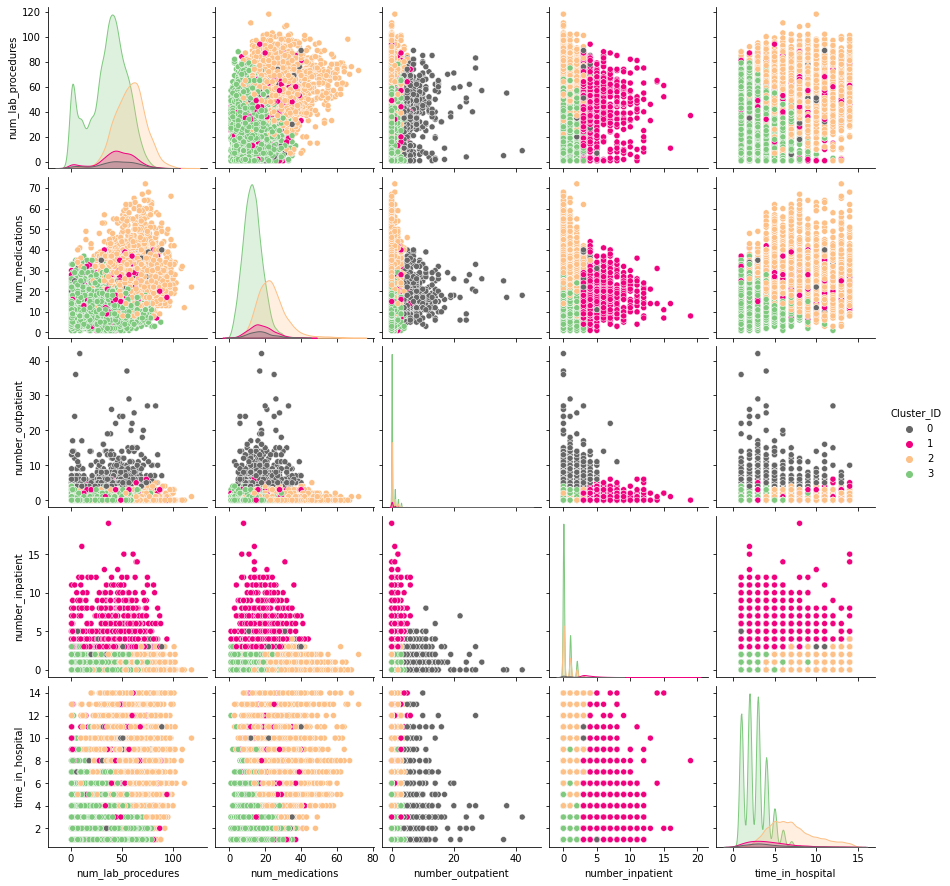

In [66]:
model = KMeans(n_clusters=4, random_state=rs).fit(X)
# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2['Cluster_ID'] = y
# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID',diag_kind='kde', palette = 'Accent_r')
plt.show()

Distribution for cluster 0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

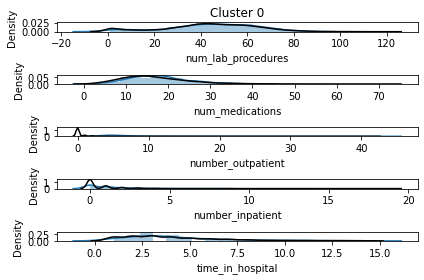

Distribution for cluster 1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

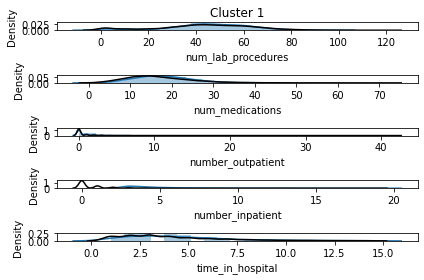

Distribution for cluster 2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

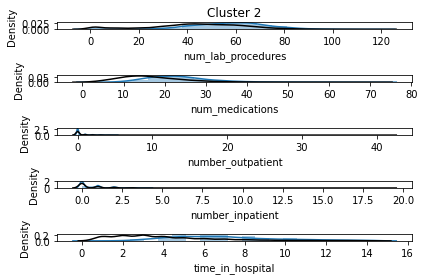

Distribution for cluster 3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

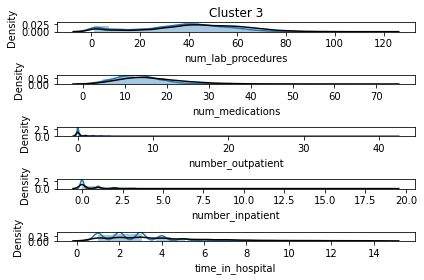

In [67]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is 
cols = ['num_lab_procedures', 'num_medications', 'number_outpatient','number_inpatient','time_in_hospital']
n_bins = 20

# inspecting cluster 0, 1, 2, 3
clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=5)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], color="k",bins=bins, ax=ax[j], hist=False)

    plt.tight_layout()
    plt.show()


In [68]:
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters=4)
agg_model.fit(X[:50]) # subset of X, only 50 data points


AgglomerativeClustering(n_clusters=4)

In [69]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
     # Children of hierarchical clustering
    children = model.children_
    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

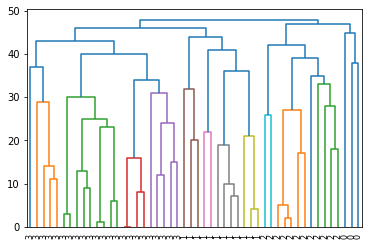

In [70]:

plot_dendrogram(agg_model, labels=agg_model.labels_)
plt.show()

# 4

In [71]:
import numpy as np
import pandas as pd
#na_value=“?”
df = pd.read_csv('D2.csv')
#,na_values="?"
df.info()
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

In [72]:
df['age']=df['age'].astype(str)

In [73]:
df['age'].unique()

array(['[80-90)', '[70-80)', '[50-60)', '[40-50)', '[60-70)', '[90-100)',
       '[30-40)', '[10-20)', '[20-30)', '[0-10)'], dtype=object)

In [74]:
from sklearn.preprocessing import StandardScaler

# mapping
age_map = {'[80-90)':2, '[70-80)':3, '[50-60)':5, '[40-50)':6, '[60-70)':4, 
'[90-100)':1, '[30-40)':7,'[10-20)':9, '[20-30)':8, '[0-10)':10}
df['age'] = df['age'].map(age_map)


In [75]:
df['age'].unique()

array([ 2,  3,  5,  6,  4,  1,  7,  9,  8, 10])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  int64 
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


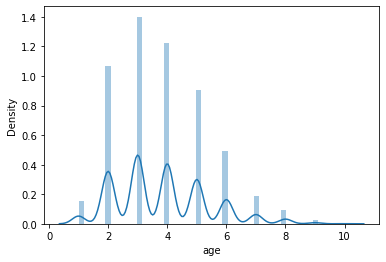

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


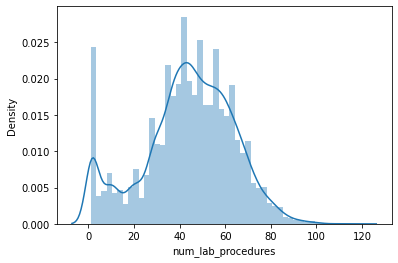

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


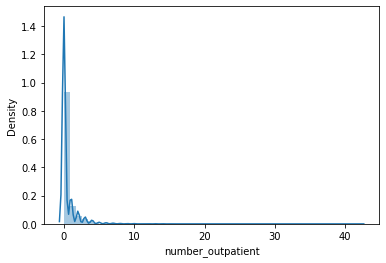

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


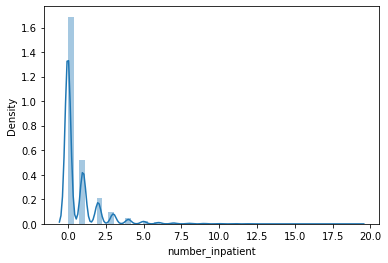

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


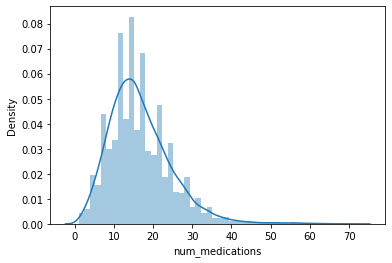

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


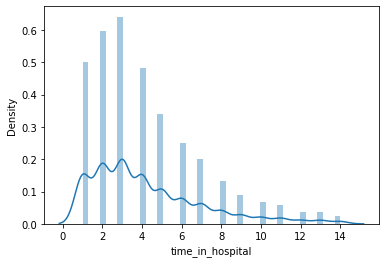

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

regdens_dist = sns.distplot(df['age'].dropna())
plt.show()

regdens_dist = sns.distplot(df['num_lab_procedures'].dropna())
plt.show()

medhhinc_dist = sns.distplot(df['number_outpatient'].dropna())
plt.show()

meanhhsz_dist = sns.distplot(df['number_inpatient'].dropna())
plt.show()

meanhhsz_dist = sns.distplot(df['num_medications'].dropna())
plt.show()

meanhhsz_dist = sns.distplot(df['time_in_hospital'].dropna())
plt.show()



In [78]:
from sklearn.preprocessing import StandardScaler
# take 3 variables and drop the rest
df2 = df[['age','num_lab_procedures', 'num_medications', 'number_outpatient','number_inpatient','time_in_hospital']]
# convert df2 to matrix
X = df2.to_numpy()
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [79]:
from sklearn.cluster import KMeans

# random state, we will use 42 instead of 10 for a change
rs = 42

# set the random state. different random state seeds might result in different centroids locations
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 75402.99187569937
Centroid locations:
[-0.56437638 -0.291959   -0.39454727 -0.114709   -0.19629998 -0.44984517]
[ 1.27814764 -0.27494959 -0.40466147 -0.14482267 -0.23211399 -0.46210408]
[-0.19484977  0.7430679   1.00719368 -0.11482005 -0.07601014  1.18979329]
[0.18337455 0.07539999 0.20474947 1.72794657 2.43730643 0.07593148]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Cluster membership
0    9022
2    5091
1    4569
3    1318
Name: Cluster_ID, dtype: int64


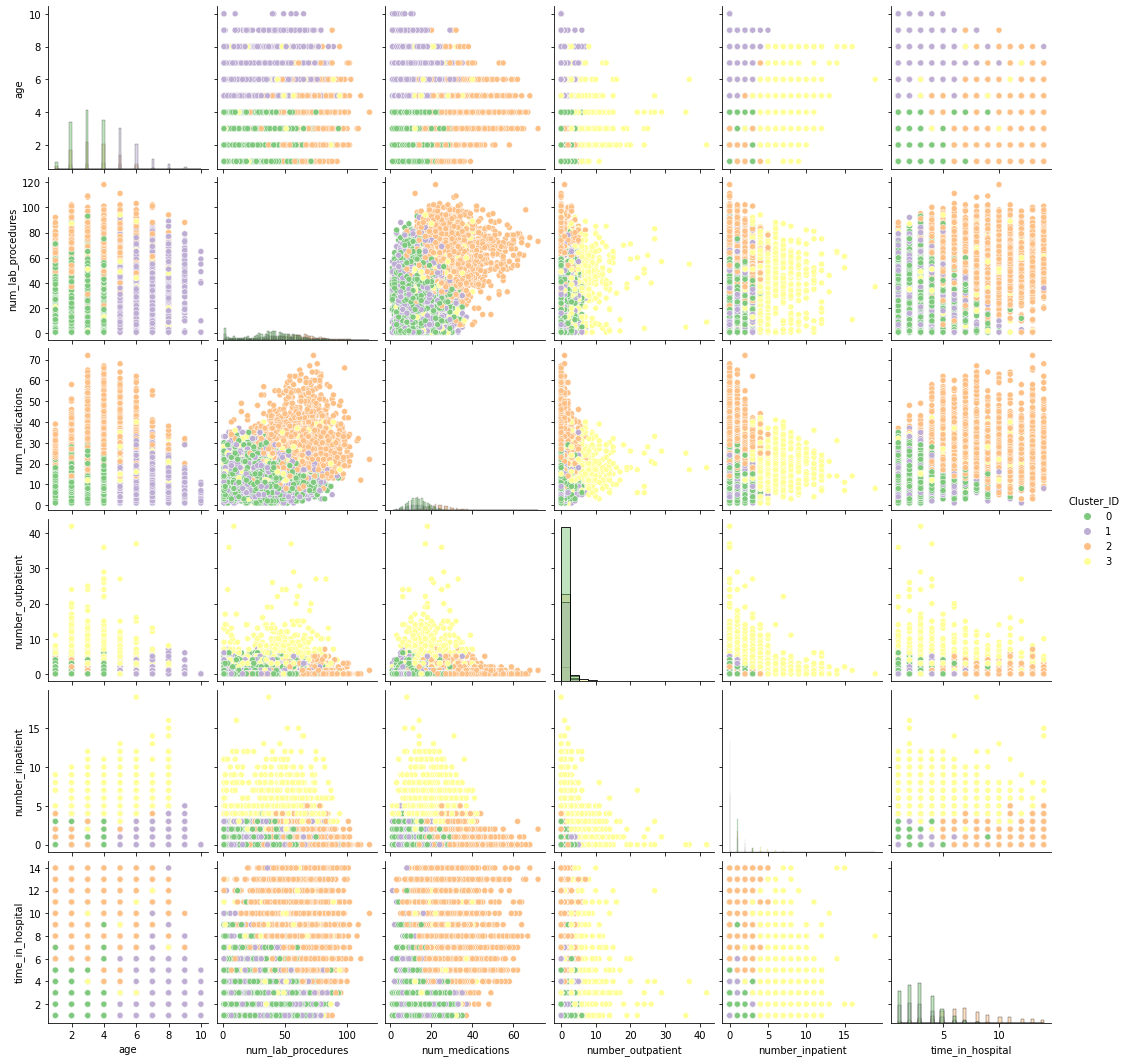

In [81]:

model = KMeans(n_clusters=4, random_state=rs).fit(X)
# assign cluster ID to each record in X
# Ignore the warning, does not apply to our case here
y = model.predict(X)
df2['Cluster_ID'] = y
# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())

# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID',diag_kind='hist', palette='Accent')
plt.show()

Distribution for cluster 0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

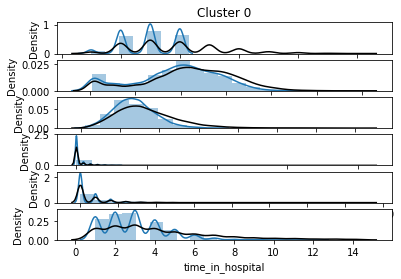

Distribution for cluster 1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

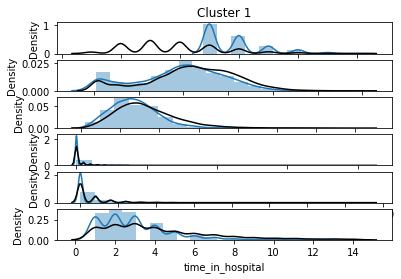

Distribution for cluster 2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

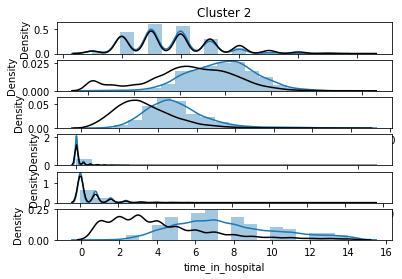

Distribution for cluster 3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

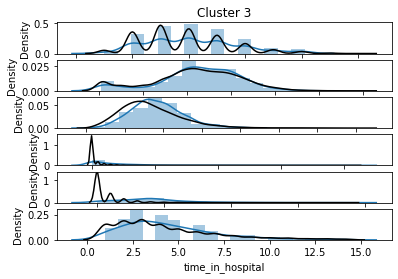

In [86]:
# prepare the column and bin size. Increase bin size to be more specific, but 20 is 
cols = ['age','num_lab_procedures', 'num_medications', 'number_outpatient','number_inpatient','time_in_hospital']
n_bins = 20

# inspecting cluster 0 to 3
clusters_to_inspect = [0, 1, 2, 3]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {}".format(cluster))

    # create subplots
    fig, ax = plt.subplots(nrows=6)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df2[col], color="k",bins=bins, ax=ax[j], hist=False)

    plt.tight_layout()
    plt.show()
